In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Terms by year

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot, heatmap

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

#
# Columns of the dataframe
#
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

## Document type

In [3]:
df.documents_by_term_per_year(column="Document Type")

,Document Type,Year,Num Documents,ID
0,Article,2010,1,[143]
1,Conference Paper,2010,1,[144]
2,Conference Review,2010,1,[142]
3,Article,2011,1,[140]
4,Conference Paper,2011,1,[141]
5,Article,2012,1,[138]
6,Conference Paper,2012,1,[139]
7,Article,2013,3,"[134, 135, 136]"
8,Book Chapter,2013,1,[137]
9,Article,2014,2,"[131, 132]"


In [4]:
df.documents_by_term_per_year(column="Document Type", as_matrix=True)

,Article,Article in Press,Book Chapter,Conference Paper,Conference Review
2010,1,0,0,1,1
2011,1,0,0,1,0
2012,1,0,0,1,0
2013,3,0,1,0,0
2014,2,0,0,1,0
2015,1,0,0,1,0
2016,3,0,0,2,0
2017,7,0,0,12,0
2018,8,2,0,42,0
2019,25,0,0,28,0


In [6]:
heatmap(df.documents_by_term_per_year(column="Document Type", as_matrix=True))

,Article,Article in Press,Book Chapter,Conference Paper,Conference Review
2010,1,0,0,1,1
2011,1,0,0,1,0
2012,1,0,0,1,0
2013,3,0,1,0,0
2014,2,0,0,1,0
2015,1,0,0,1,0
2016,3,0,0,2,0
2017,7,0,0,12,0
2018,8,2,0,42,0
2019,25,0,0,28,0


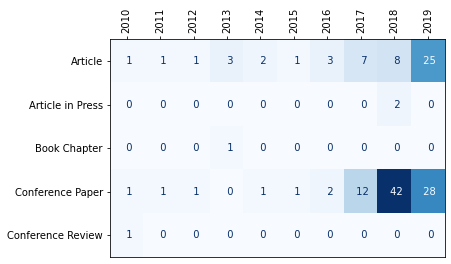

In [7]:
Plot(df.documents_by_term_per_year(column="Document Type", as_matrix=True)).heatmap(
    cmap="Blues"
)

## Source title

In [9]:
df.documents_by_term_per_year(column="Source title").head()

,Source title,Year,Num Documents,ID
0,European Journal of Finance,2010,1,[143]
1,Proceedings - 2010 6th International Conferenc...,2010,1,[144]
2,Proceedings of the 18th European Symposium on ...,2010,1,[142]
3,Applied Soft Computing Journal,2011,1,[141]
4,Expert Systems with Applications,2011,1,[140]


In [10]:
df.documents_by_term_per_year(column="Source title", minmax=(2, 4))

,Source title,Year,Num Documents,ID
30,Lecture Notes in Computer Science (including s...,2017,4,"[119, 120, 121, 122]"
46,ACM International Conference Proceeding Series,2018,2,"[69, 75]"
49,Applied Soft Computing Journal,2018,2,"[67, 80]"
62,Procedia Computer Science,2018,2,"[90, 91]"
74,Proceedings of the International Joint Confere...,2018,2,"[63, 64]"
100,Lecture Notes in Computer Science (including s...,2019,4,"[36, 42, 45, 49]"
82,Advances in Intelligent Systems and Computing,2019,3,"[41, 51, 52]"
87,Expert Systems with Applications,2019,3,"[0, 1, 11]"
101,Neural Computing and Applications,2019,3,"[27, 37, 44]"
99,Knowledge-Based Systems,2019,2,"[4, 25]"


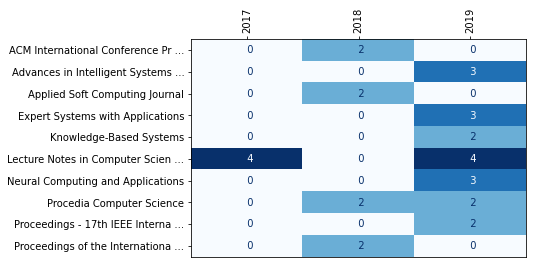

In [11]:
Plot(
    df.documents_by_term_per_year(column="Source title", as_matrix=True, minmax=(2, 4))
).heatmap(cmap="Blues")

In [12]:
#
# Selects the top 10 journals by frequency
#
top_journals = df.documents_by_term("Source title").head(10)["Source title"]
top_journals

0    Lecture Notes in Computer Science (including s...
1                     Expert Systems with Applications
2                                          IEEE Access
3                            Procedia Computer Science
4        Advances in Intelligent Systems and Computing
5                       Applied Soft Computing Journal
6                    Neural Computing and Applications
7       ACM International Conference Proceeding Series
8    Communications in Computer and Information Sci...
9    International Journal of Circuits, Systems and...
Name: Source title, dtype: object

In [18]:
#
# Matrix of documents by `Source title` by `Year`
#
matrix = df.documents_by_term_per_year(column="Source title", as_matrix=True)

#
# Column filtering by `top_journals`
#
matrix = matrix.loc[:, top_journals]
matrix

,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics),Expert Systems with Applications,IEEE Access,Procedia Computer Science,Advances in Intelligent Systems and Computing,Applied Soft Computing Journal,Neural Computing and Applications,ACM International Conference Proceeding Series,Communications in Computer and Information Science,"International Journal of Circuits, Systems and Signal Processing"
2010,0,0,0,0,0,0,0,0,0,0
2011,0,1,0,0,0,1,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0
2014,1,0,0,0,0,0,0,0,0,0
2015,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,1
2017,4,0,0,0,0,0,0,0,0,0
2018,9,1,0,2,0,2,0,2,1,1
2019,4,3,5,2,3,0,3,0,1,0


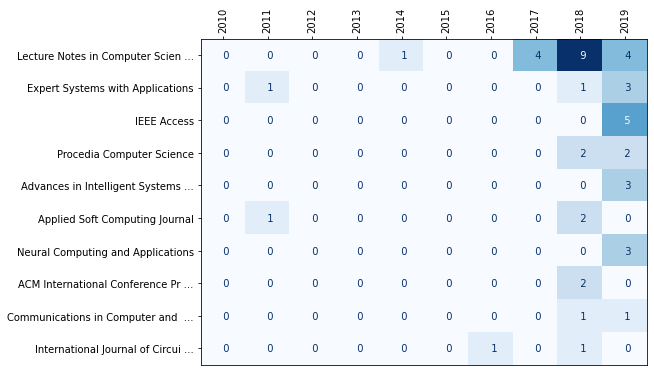

In [19]:
#
# Heatmap of number of documents by top journals per year
#
plt.figure(figsize=(8, 6))
Plot(matrix).heatmap(cmap="Blues")

## Authors

In [20]:
df.documents_by_term_per_year(column="Authors", sep=",").head()

,Authors,Year,Num Documents,ID
0,Dunis C.L.,2010,1,[143]
1,Laws J.,2010,1,[143]
2,Lin X.(1),2010,1,[144]
3,Sermpinis G.,2010,1,[143]
4,Song Y.(1),2010,1,[144]


In [21]:
top_authors = df.documents_by_term("Authors").head(10).Authors
top_authors

0       Arevalo A.
1       Gabbouj M.
2     Hernandez G.
3     Hussain A.J.
4     Iosifidis A.
5    Kanniainen J.
6          Leon D.
7          Nino J.
8      Passalis N.
9      Sandoval J.
Name: Authors, dtype: object

In [23]:
#
# Matrix of documents by `Authors` per`Year`
#
matrix = df.documents_by_term_per_year(column="Authors", as_matrix=True)

#
# Column filtering by `top_journals`
#
matrix = matrix.loc[:, top_authors]
heatmap(matrix)

,Arevalo A.,Gabbouj M.,Hernandez G.,Hussain A.J.,Iosifidis A.,Kanniainen J.,Leon D.,Nino J.,Passalis N.,Sandoval J.
2010,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,1,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,1,0,0,0,0,0,0
2015,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,1,0,0,0,0,0,0
2017,0,2,0,0,2,2,0,0,2,0
2018,2,0,2,0,0,0,2,2,0,2
2019,1,1,1,0,1,1,1,1,1,1


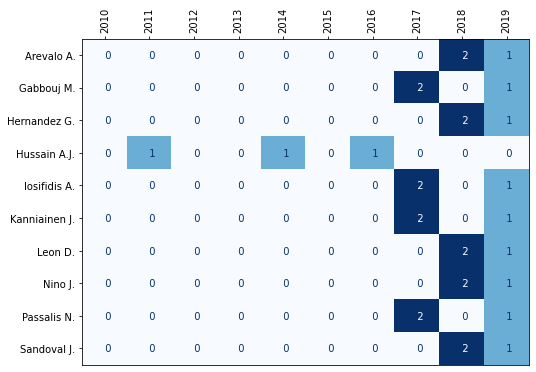

In [24]:
#
# Heatmap of number of documents by author per year
#
plt.figure(figsize=(8, 6))
Plot(matrix).heatmap(cmap="Blues")

## Keywords

In [25]:
df.documents_by_term_per_year(column="keywords", sep=";").head()

,keywords,Year,Num Documents,ID
2,Artificial Neural Network,2010,2,"[142, 144]"
3,Artificial Neural Networks,2010,2,"[142, 144]"
16,Machine Learning,2010,2,"[142, 144]"
18,Neural Network,2010,2,"[142, 144]"
19,Neural Networks,2010,2,"[142, 144]"


In [34]:
df.documents_by_term_per_year(
    column="keywords_cleaned", sep=";", as_matrix=True, minmax=(6, 20)
).transpose().head()

,2017,2018,2019
Learning systems,0,8,7
algorithms,0,12,15
artificial intelligence,0,0,6
artificial neural networks,0,0,6
brain,0,8,0


In [30]:
top_keywords = (
    df.documents_by_term("keywords_cleaned", sep=";").head(10).keywords_cleaned
)
top_keywords

0                       forecasting
1                       time series
2                            market
3                     deep learning
4                   neural networks
5                           trading
6                          commerce
7         recurrent neural networks
8    long short term memory network
9                        prediction
Name: keywords_cleaned, dtype: object

In [32]:
#
# Matrix of documents by `keywords_cleaned` per`Year`
#
matrix = df.documents_by_term_per_year(
    column="keywords_cleaned", sep=";", as_matrix=True
)

#
# Column filtering by `top_journals`
#
matrix = matrix.loc[:, top_keywords]
heatmap(matrix)

,forecasting,time series,market,deep learning,neural networks,trading,commerce,recurrent neural networks,long short term memory network,prediction
2010,1,3,1,2,3,1,1,2,0,3
2011,2,2,2,2,2,1,2,2,0,2
2012,2,2,1,0,2,0,0,1,0,2
2013,4,3,2,1,1,1,1,1,2,1
2014,3,1,3,1,1,2,2,2,1,2
2015,2,1,1,1,0,0,1,0,0,2
2016,5,3,3,3,1,1,0,3,1,4
2017,15,11,11,7,10,11,9,4,8,2
2018,37,35,32,32,22,27,27,17,20,15
2019,39,34,22,21,28,22,19,20,17,13


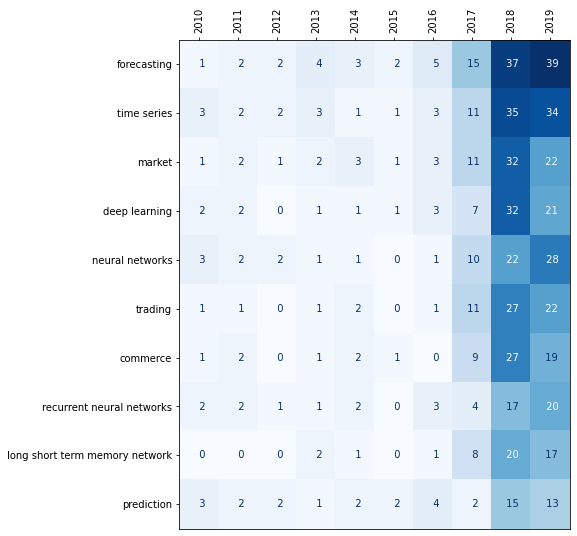

In [33]:
plt.figure(figsize=(7, 9))
Plot(matrix).heatmap(cmap="Blues")